# Exercise 1.1

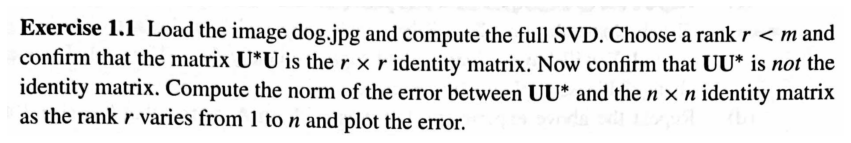

In [114]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

plt.figure(figsize=(15,5))
plt.imshow(imread('./ex1.1.png'))
plt.axis('off');

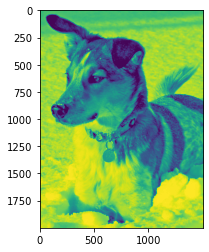

In [2]:
DOG = imread('../DATA/dog.jpg')
DOG = np.mean(DOG, -1)
plt.imshow(DOG);

In [3]:
U_dog, S_dog, VT_dog = np.linalg.svd(DOG, full_matrices=True)

In [4]:
#Let r be
r = U.shape[0] - VT.shape[0]
print('r =',r)

r = 500


In [5]:
#It's the identity matrix
np.linalg.inv(U_dog[:r,:r]) @ U_dog[:r,:r]

array([[ 1.00000000e+00,  7.70938868e-13,  6.11199980e-12, ...,
         7.92965693e-12,  1.22355459e-11, -3.09796633e-12],
       [ 3.30890870e-12,  1.00000000e+00,  5.29531974e-12, ...,
         7.90123522e-12,  9.66338121e-12, -3.48165941e-12],
       [-3.94129174e-13,  2.52176058e-12,  1.00000000e+00, ...,
        -1.03028697e-12, -1.02460262e-11,  5.81934501e-12],
       ...,
       [-6.23112673e-15, -1.36696210e-14, -2.54726795e-14, ...,
         1.00000000e+00, -9.54791801e-15, -1.88737914e-15],
       [-2.93098879e-14, -9.57567359e-15, -5.57887070e-14, ...,
         1.24344979e-14,  1.00000000e+00,  3.64153152e-14],
       [-2.57016630e-14, -6.66133815e-16, -3.89688282e-14, ...,
         9.99200722e-15,  6.88338275e-15,  1.00000000e+00]])

In [6]:
#It's still the identity matrix...
U_dog[:r,:r] @ np.linalg.inv(U_dog[:r,:r])

array([[ 1.00000000e+00, -3.43058915e-14, -8.70414851e-14, ...,
         2.22044605e-14, -1.40998324e-14,  4.71844785e-15],
       [-1.29896094e-14,  1.00000000e+00,  1.33226763e-15, ...,
         2.64233080e-14, -1.44884105e-14, -6.93195501e-15],
       [-1.23234756e-14, -3.55271368e-15,  1.00000000e+00, ...,
         5.13478149e-14, -1.03250741e-14,  2.77555756e-15],
       ...,
       [ 1.17406085e-14, -7.47180096e-14, -9.19264664e-14, ...,
         1.00000000e+00, -2.75057754e-14,  2.38697950e-15],
       [-1.55431223e-15,  4.77395901e-14, -8.73745520e-14, ...,
        -9.99200722e-15,  1.00000000e+00, -7.66053887e-15],
       [ 0.00000000e+00, -8.88178420e-16, -4.21884749e-15, ...,
         1.55431223e-15, -7.88258347e-15,  1.00000000e+00]])

In [7]:
loss = [np.linalg.norm(U_dog[:r,:r] @ np.linalg.inv(U_dog[:r,:r]) - np.eye(r)) for r in range(U_dog.shape[0])]

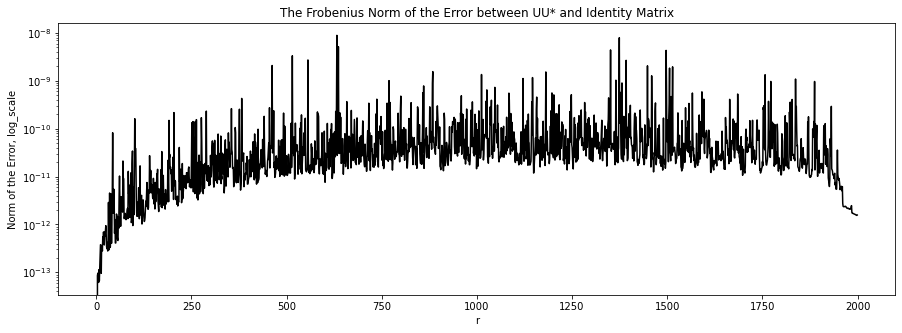

In [8]:
plt.figure(figsize=(15,5))
plt.title('The Frobenius Norm of the Error between UU* and Identity Matrix')
plt.xlabel('r')
plt.ylabel('Norm of the Error, log_scale')
plt.yscale('log')
plt.plot(loss, color='black');

# Exercise 1.2

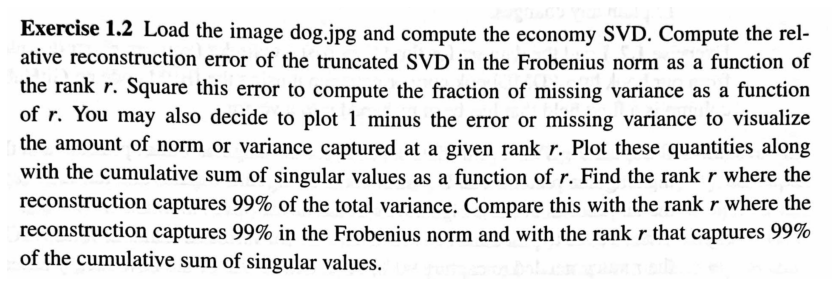

In [115]:
plt.figure(figsize=(15,5))
plt.imshow(imread('./ex1.2.png'))
plt.axis('off');

In [10]:
U_dog_economy, S_dog_economy, VT_dog_economy = np.linalg.svd(DOG, full_matrices=False)

In [96]:
def rel_reconstruction_errror(image, U,S,VT, r, prints=True):
    er = abs(np.linalg.norm(U[:r,:r] @ np.diag(S)[:r,:r] @ VT[:r,:r])/np.linalg.norm(image) - 1)
    if prints:
        print('For truncation at r =', r)
        print('The Relative reconstruction error =', er)
        
    return er

test = rel_reconstruction_errror(DOG, U_dog_economy, S_dog_economy, VT_dog_economy, 1)

For truncation at r = 1
The Relative reconstruction error = 0.9993040957251453


In [97]:
print('Fraction of missing variance at r = 1 is ', test**2)

Fraction of missing variance at r = 1 is  0.9986086757330505


In [19]:
test = [rel_reconstruction_errror(DOG, U_dog_economy, S_dog_economy, VT_dog_economy, r, prints=False) for r in range(len(S_ec))]

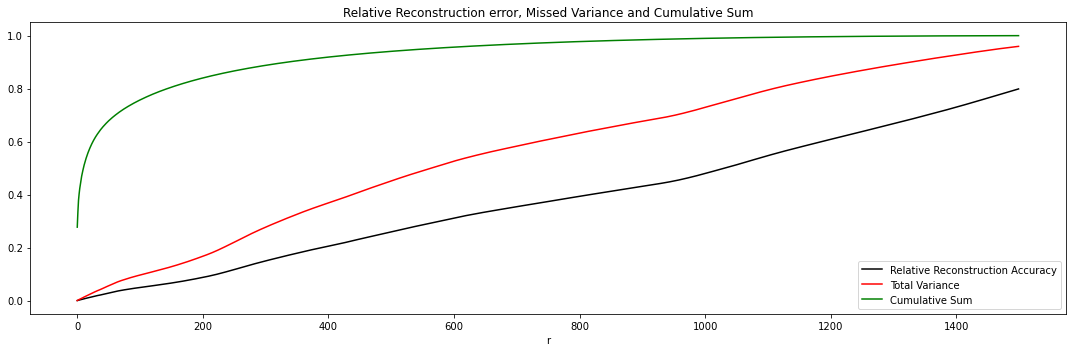

In [20]:
plt.figure(figsize=(15,5))

plt.title('Relative Reconstruction error, Missed Variance and Cumulative Sum')
plt.xlabel('r')
plt.plot(1-np.array(test), color='black', label='Relative Reconstruction Accuracy')
plt.plot(1-np.array(test)**2, color='red', label='Total Variance')
plt.plot(np.cumsum(S_ec)/sum(S_ec), color='green', label='Cumulative Sum')
plt.legend();

plt.tight_layout()

So, as we can see, 99% of cumsum approaches at r approximately equals to 1006

However, at the same r we get only about 75% total variance, we need to take r up to 1400-1500 in order to get 99%

The Relative Reconstruction Accuracy even can't approach to 99%

# Exercise 1.3

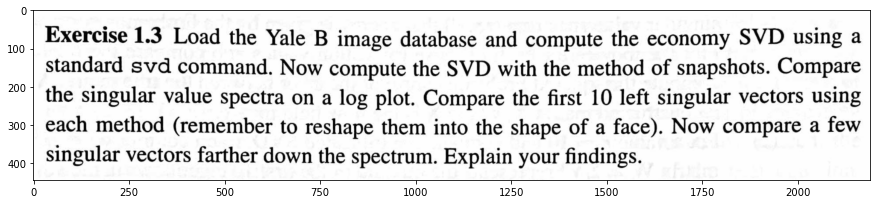

In [21]:
plt.figure(figsize=(15,5))
plt.imshow(imread('./ex1.3.png'));

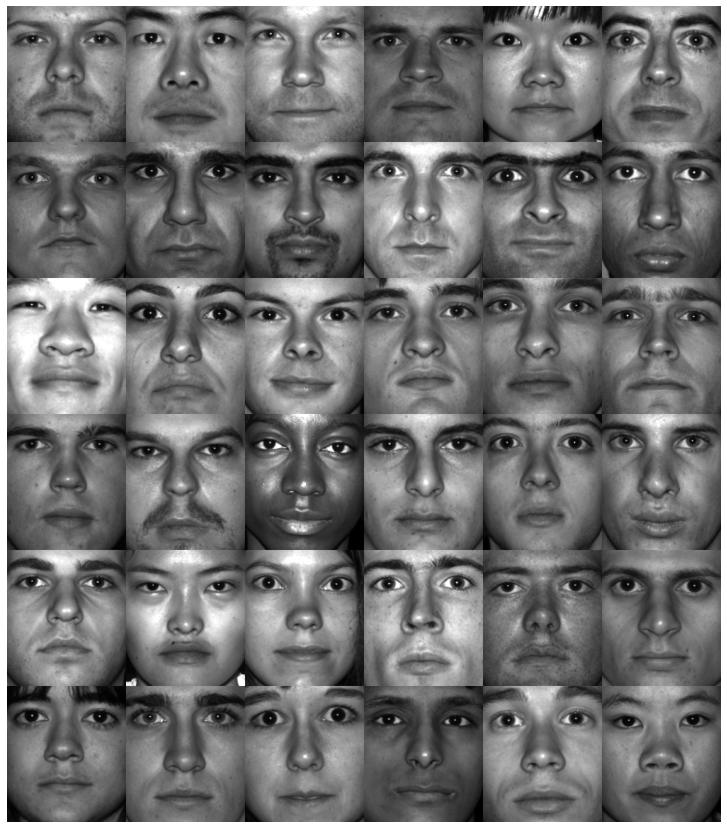

In [116]:
#I hope it's the Yale B image database, because otherwise there is no details about how I can load it
mat_contents = scipy.io.loadmat('../DATA/allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1

plt.rcParams['figure.figsize'] = [15, 15]
plt.imshow(allPersons).set_cmap('gray')
plt.axis('off');

In [120]:
allPersons.shape

(1152, 1008)

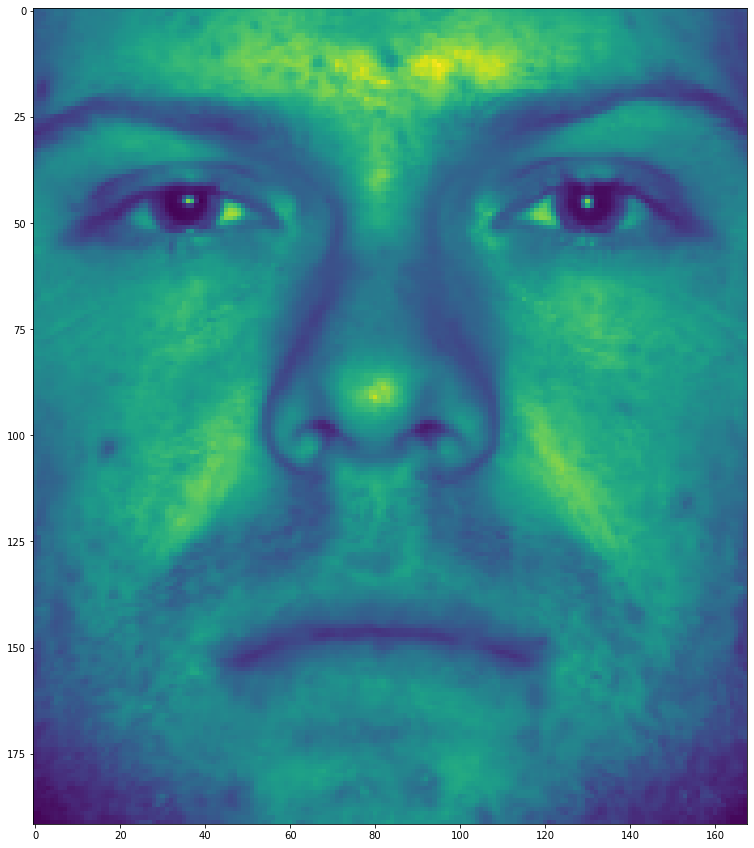

In [125]:
plt.imshow(allPersons[:1152//6,:1008//6])

In [126]:
U_yale_economy, S_yale_economy, VT_yale_economy = np.linalg.svd(allPersons, full_matrices=False)

# Exercise 1.4

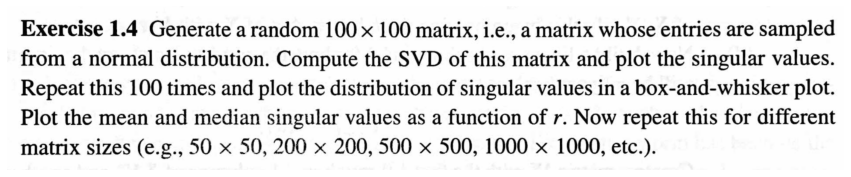

In [113]:
plt.figure(figsize=(15,5))
plt.imshow(imread('./ex1.4.png'))
plt.axis('off');

In [26]:
A = np.random.normal(size=(100,100))
U_A, S_A, VT_A = np.linalg.svd(A, full_matrices=True)
S_A

array([19.60298053, 18.92474788, 18.79079323, 18.28680451, 18.00236529,
       17.73945595, 17.31644351, 17.02780936, 16.58155424, 16.34149896,
       16.0159671 , 15.79006298, 15.58271651, 15.50406778, 15.20202776,
       15.04782554, 14.95863998, 14.51409406, 14.36206504, 14.05984727,
       13.74423738, 13.65023951, 13.09130335, 13.04671019, 12.96998978,
       12.69638023, 12.54859811, 12.22269924, 12.06301556, 11.70847073,
       11.56728162, 11.51253462, 11.21069597, 10.97421753, 10.90454947,
       10.57640878, 10.52463135, 10.25426245, 10.24776126,  9.90505031,
        9.80496718,  9.69940429,  9.31465711,  9.26875566,  9.17788171,
        8.66327989,  8.53280812,  8.36615469,  8.27135872,  7.98425522,
        7.94951729,  7.6853875 ,  7.33523188,  7.18236289,  7.04336421,
        6.9461296 ,  6.90979272,  6.78298047,  6.61805235,  6.37582741,
        6.22266544,  6.18221407,  5.93818257,  5.78014864,  5.64705405,
        5.50818504,  5.38756123,  5.32472746,  5.28125912,  5.10

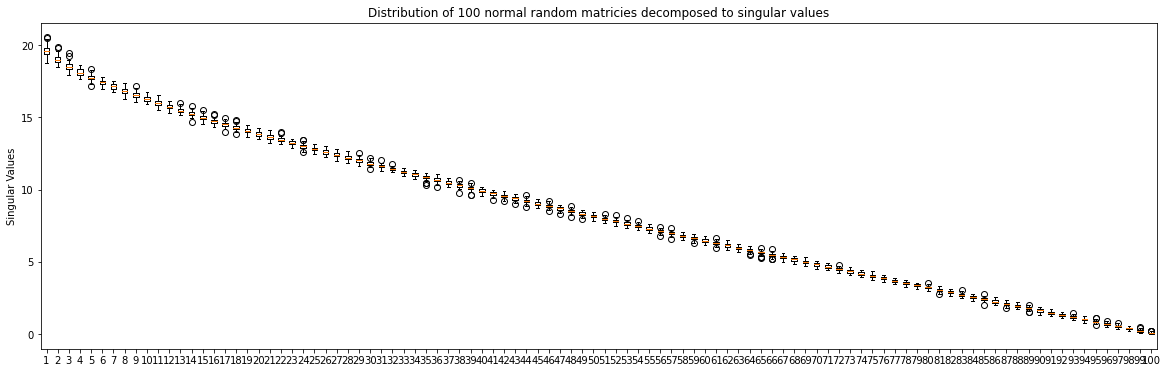

In [94]:
plt.figure(figsize=(20,6))
plt.boxplot(np.array([np.linalg.svd(np.random.normal(size=(100,100)), full_matrices=True)[1] for i in range(100)]))
plt.title('100 Distributions of normal random matricies decomposed to singular values')
plt.ylabel('Singular Values');

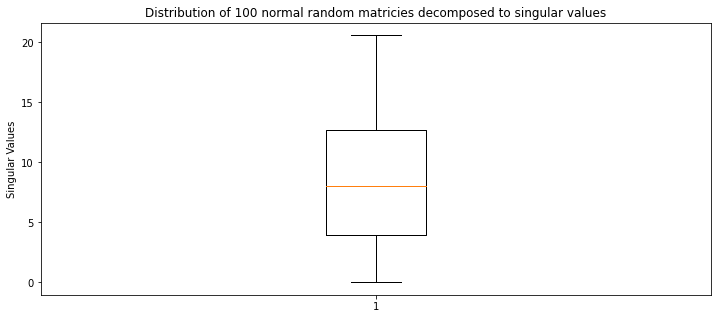

In [48]:
plt.figure(figsize=(12,5))
plt.boxplot(np.array([np.linalg.svd(np.random.normal(size=(100,100)), full_matrices=True)[1] for i in range(100)]).reshape(-1,1))
plt.title('Distribution of 100 normal random matricies decomposed to singular values')
plt.ylabel('Singular Values');

In [88]:
def my_median(S):
    res = []
    for i in range( S.shape[0]):
        res.append(np.median(S[:i+1]))
    return res

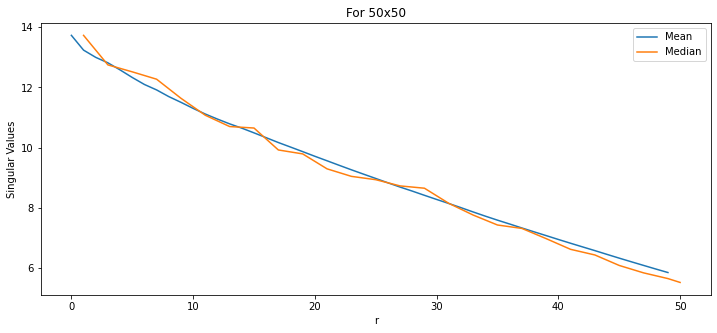

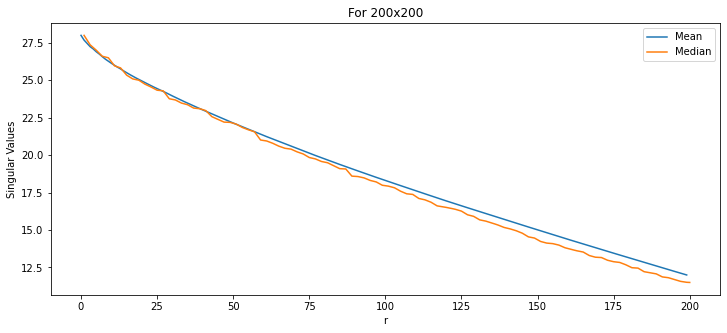

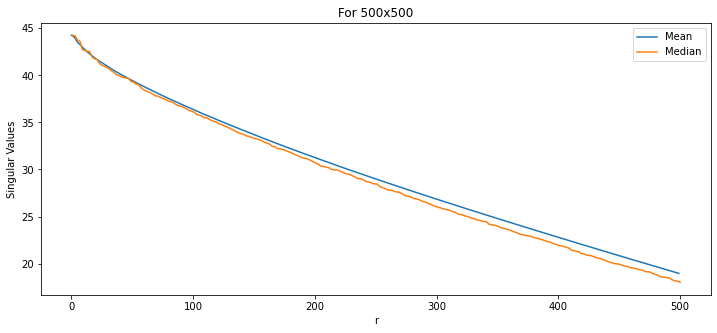

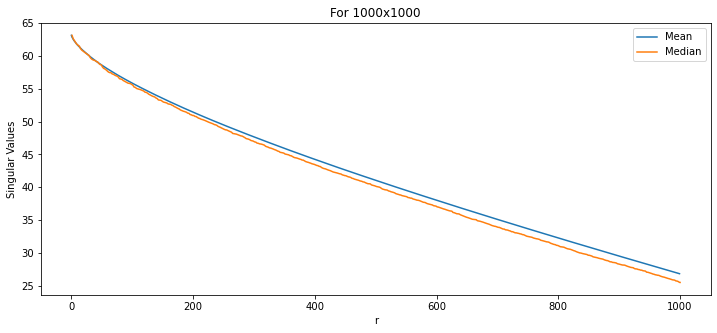

In [92]:
for i in [50, 200, 500, 1000]:
    temp_S = np.linalg.svd(np.random.normal(size=(i,i)), full_matrices=True)[1]
    
    plt.figure(figsize=(12,5))
    plt.title('For {}x{}'.format(i,i))
    plt.ylabel('Singular Values')
    plt.xlabel('r')
    plt.plot(np.cumsum(temp_S)/np.arange(1,len(temp_S)+1), label='Mean')
    plt.plot(np.arange(1,len(temp_S)+1), my_median(temp_S), label='Median')
    plt.legend()